In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#df = pd.read_csv('C:/Users/DalilR/Desktop/Clustering/Communities.csv',header=None,na_values="?")
df = pd.read_csv('/content/Communities.csv',header=None,na_values="?")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [0]:
hd = ['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']
df.columns = hd

In [6]:
nulls = df.isnull().sum()
print(nulls[nulls>0])
print('On a', len(nulls[nulls>0]), 'colonnes à valeurs manquantes')

county                  1174
community               1177
OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64
On a 25 colonnes à valeurs manquantes


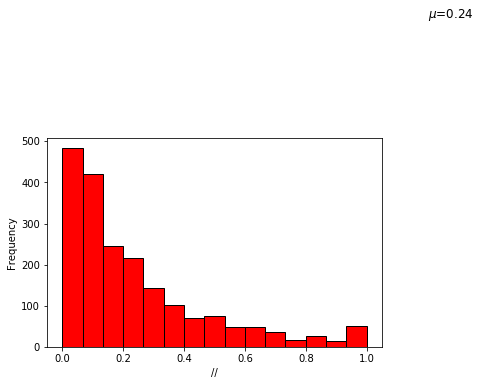

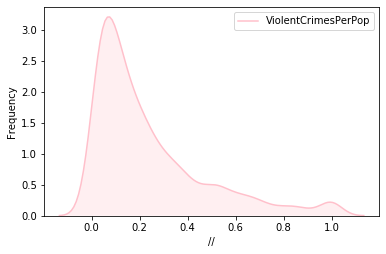

In [7]:
fig = plt.figure(figsize = (6,4))
#title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("//")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['ViolentCrimesPerPop'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['ViolentCrimesPerPop'], color='red', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
#title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("//")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['ViolentCrimesPerPop'], ax=ax1, shade=True, color='pink')

#df[127].hist(color='red',edgecolor='black',grid=False)
#sns.kdeplot(df[127],color='pink')

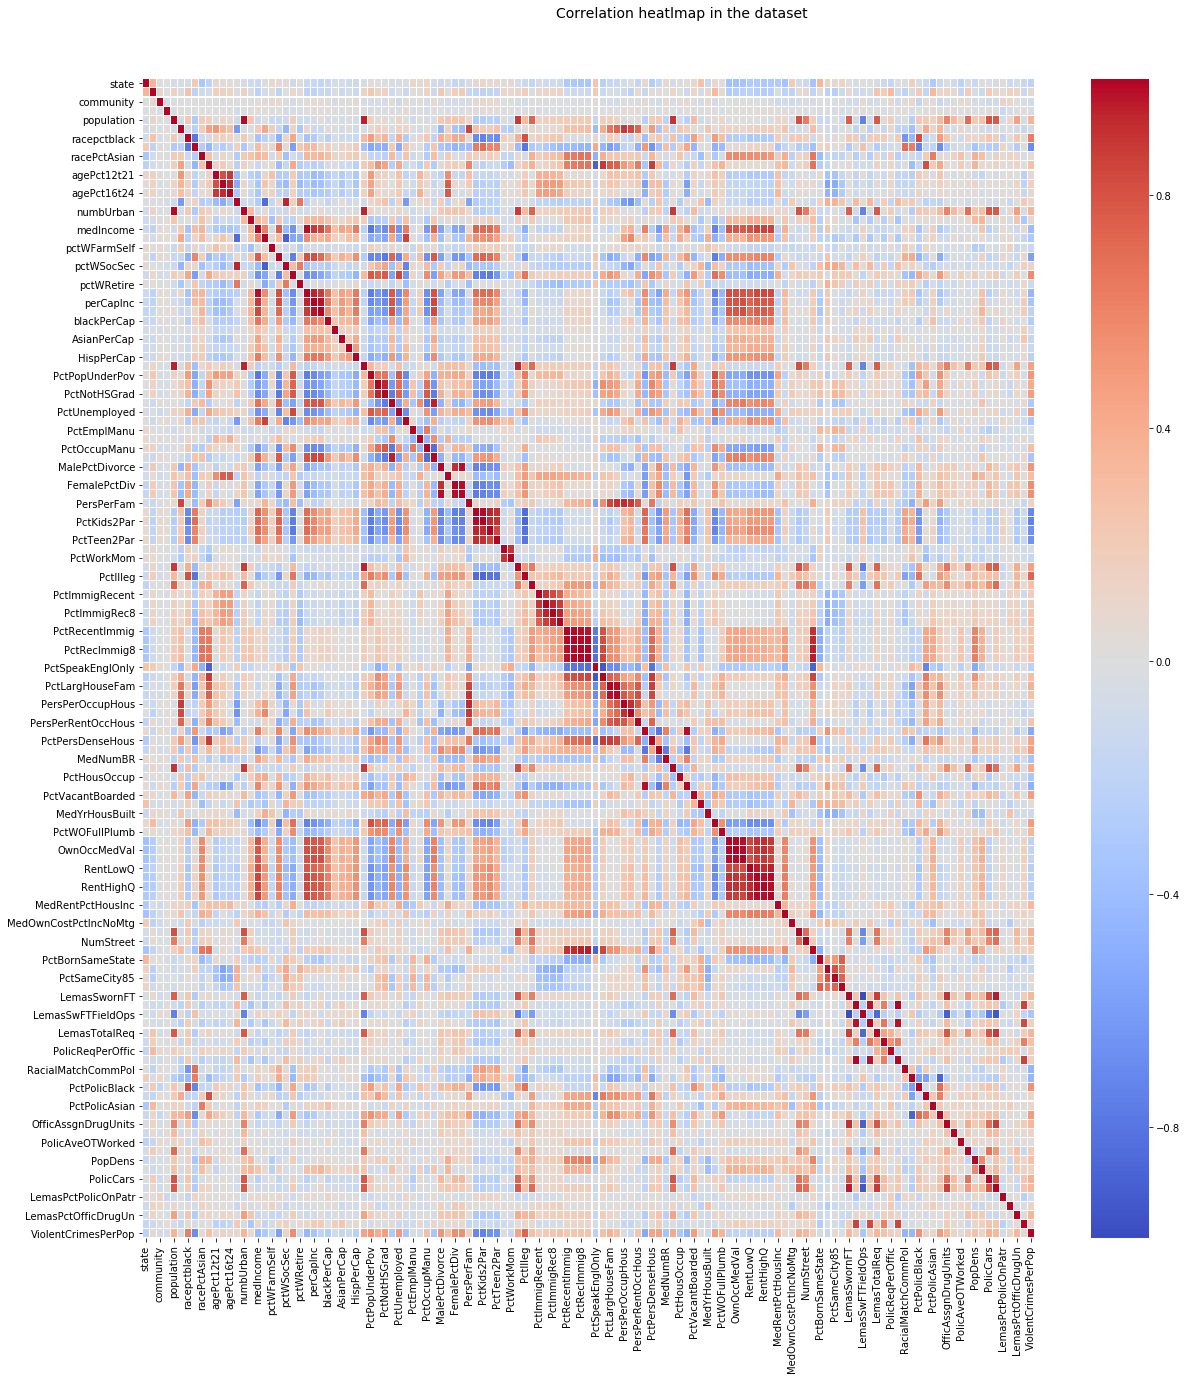

In [8]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=False, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation heatlmap in the dataset', fontsize=14)

In [9]:
correlations = abs(corr['ViolentCrimesPerPop'])
var_int = correlations[correlations>0.5]
var_int

racepctblack           0.631264
racePctWhite           0.684770
pctWInvInc             0.576324
pctWPubAsst            0.574665
PctPopUnderPov         0.521877
PctUnemployed          0.504235
MalePctDivorce         0.525407
FemalePctDiv           0.556032
TotalPctDiv            0.552777
PctFam2Par             0.706667
PctKids2Par            0.738424
PctYoungKids2Par       0.666059
PctTeen2Par            0.661582
PctIlleg               0.737957
PctPersOwnOccup        0.525491
PctPolicBlack          0.543545
ViolentCrimesPerPop    1.000000
Name: ViolentCrimesPerPop, dtype: float64

In [10]:
dfhi = df[df['ViolentCrimesPerPop']>=0.75]
dflo = df[df['ViolentCrimesPerPop']<=0.25]

print(dfhi['medIncome'].describe(), dflo['medIncome'].describe())

count    104.000000
mean       0.205096
std        0.113000
min        0.000000
25%        0.137500
50%        0.180000
75%        0.252500
max        1.000000
Name: medIncome, dtype: float64 count    1341.000000
mean        0.418001
std         0.218510
min         0.020000
25%         0.240000
50%         0.390000
75%         0.550000
max         1.000000
Name: medIncome, dtype: float64


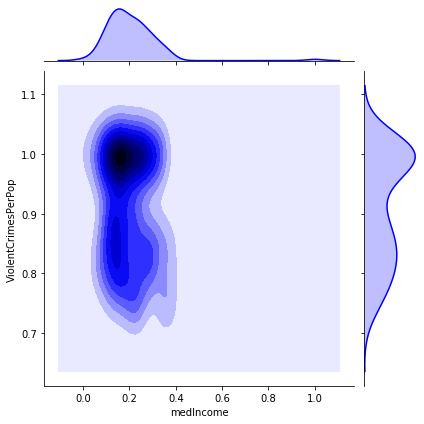

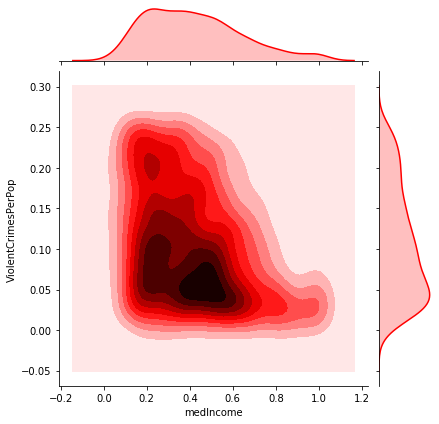

In [11]:
sns.jointplot(x=dfhi['medIncome'], y=dfhi['ViolentCrimesPerPop'],kind='kde',color='blue')
sns.jointplot(x=dflo['medIncome'], y=dflo['ViolentCrimesPerPop'],kind='kde', color='red')


In [12]:
print(dfhi['PctKids2Par'].describe(), dflo['PctKids2Par'].describe())

count    104.000000
mean       0.255096
std        0.178020
min        0.000000
25%        0.120000
50%        0.240000
75%        0.372500
max        0.930000
Name: PctKids2Par, dtype: float64 count    1341.000000
mean        0.711402
std         0.150534
min         0.090000
25%         0.610000
50%         0.730000
75%         0.820000
max         1.000000
Name: PctKids2Par, dtype: float64


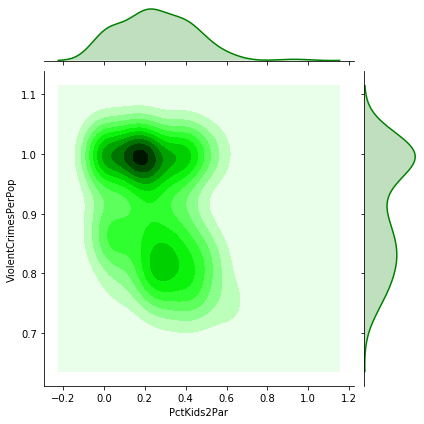

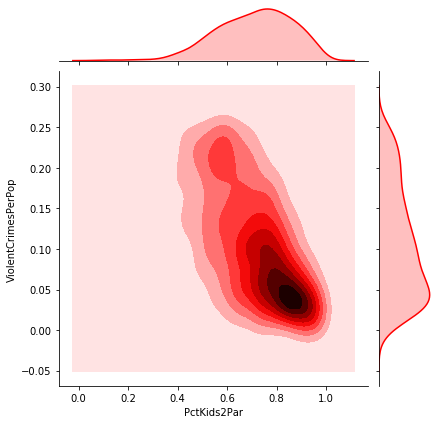

In [13]:
sns.jointplot(x=dfhi['PctKids2Par'], y=dfhi['ViolentCrimesPerPop'],kind='kde',color='green')
sns.jointplot(x=dflo['PctKids2Par'], y=dflo['ViolentCrimesPerPop'],kind='kde', color='red')

In [14]:
df['OtherPerCap'].dropna(axis=0)

0       0.36
1       0.22
2       0.28
3       0.36
4       0.51
        ... 
1989    0.36
1990    0.23
1991    0.22
1992    0.27
1993    0.25
Name: OtherPerCap, Length: 1993, dtype: float64

In [15]:
ft_to_drop = nulls[nulls>0]
ft_to_drop

county                  1174
community               1177
OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64

In [0]:
df2 = df.dropna(axis=1,subset=ft_to_drop)

In [17]:
nulls2 = df2.isnull().sum()
print(nulls2[nulls2>0])

OtherPerCap    1
dtype: int64


In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor as rfr

In [0]:
y = df2['ViolentCrimesPerPop']
X = df2.drop(['ViolentCrimesPerPop', 'communityname','state','fold'],axis=1)

In [0]:
X.fillna(X['OtherPerCap'].mean(),inplace=True)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

model = rfr(n_estimators=100)

In [0]:
model.fit(X_train,y_train)
score = model.score(X_test,y_test)

In [49]:
score

0.5828572164896244

In [24]:
var_int

racepctblack           0.631264
racePctWhite           0.684770
pctWInvInc             0.576324
pctWPubAsst            0.574665
PctPopUnderPov         0.521877
PctUnemployed          0.504235
MalePctDivorce         0.525407
FemalePctDiv           0.556032
TotalPctDiv            0.552777
PctFam2Par             0.706667
PctKids2Par            0.738424
PctYoungKids2Par       0.666059
PctTeen2Par            0.661582
PctIlleg               0.737957
PctPersOwnOccup        0.525491
PctPolicBlack          0.543545
ViolentCrimesPerPop    1.000000
Name: ViolentCrimesPerPop, dtype: float64

In [0]:
var_cor = ['racepctblack','racePctWhite', 'pctWInvInc', 'pctWPubAsst', 'PctPopUnderPov', 'PctUnemployed', 'MalePctDivorce', 'FemalePctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
          'PctTeen2Par', 'PctIlleg', 'PctPersOwnOccup']
X2 = X[var_cor]

In [26]:
cross_val_score(model,X2,y,cv=10)

array([0.56575642, 0.58009926, 0.59044104, 0.58718535, 0.67353869,
       0.6763215 , 0.65843376, 0.62641481, 0.6599798 , 0.58067102])

In [0]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import roc_curve

In [50]:
pred = model.predict(X_test)

aerr = mae(pred,y_test)
print(aerr)

serr = mse(pred,y_test)
print(serr)

rsq = r2(pred,y_test)
print(rsq)

0.09944869739478958
0.01991331168336673
0.4608408662115273


In [0]:
def rfr_model(X, y):# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=rfr(),
        param_grid={
            'max_depth': range(3,10),
            'n_estimators': (10, 50, 100, 500), 'max_leaf_nodes':(2,3,5,7), 'max_features': (2,3,4,5)
        },
        cv=5, scoring='neg_mean_absolute_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X,y)
    best_params = grid_result.best_params_
    
    rf_r = rfr(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False, max_leaf_nodes=best_params['max_leaf_nodes'],
                                                                                                                                                           max_features= best_params['max_features'])# Perform K-Fold CV
    scores = cross_val_score(rf_r, X, y, cv=5, scoring='neg_mean_absolute_error')

    return rf_r, scores

In [0]:
final_model, final_scores = rfr_model(X,y)

In [75]:
final_scores

array([-0.10993318, -0.11918473, -0.1050111 , -0.10397306, -0.10181181])

In [77]:
final_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features=5, max_leaf_nodes=7,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=False,
                      verbose=False, warm_start=False)

In [33]:
pip install pydot

In [0]:
from sklearn.tree import export_graphviz
import pydot

feature_list = list(X.columns)

arbre = final_model.estimators_[3]
export_graphviz(arbre, out_file = 'arbre2.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('arbre2.dot')

graph.write_png('arbre2.png');

In [0]:
import numpy as np

In [54]:
importance = [final_model.feature_importances_]
features = [X.columns]
desc_importance = sorted(importance, reverse=True)
len(X.columns)

100

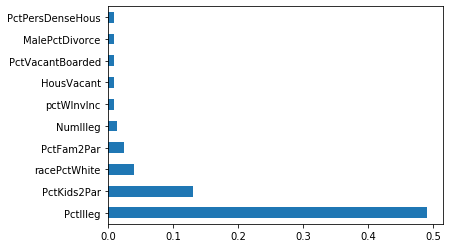

In [58]:
feat_importances = pd.Series(final_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [66]:
Xred = df2[['PctIlleg','PctKids2Par','racePctWhite','PctFam2Par','NumIlleg','HousVacant']]

reduced_model, reduced_scores = rfr_model(Xred,y)

print(reduced_scores)

[-0.10146247 -0.10863663 -0.08939905 -0.09321438 -0.0928075 ]
